## Libraries

In [89]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import numpy as np
import itertools

## Importing Dataset

In [21]:
try:
    dataset = pd.read_csv('Dataset/customers_data.csv')
    dataset.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("O dataset possui {} amostras com cada um {} features.".format(*dataset.shape))
except FileNotFoundError:
    print('Dataset NÃO encontrado')

O dataset possui 440 amostras com cada um 6 features.


**Dataset Description**
    - FRESH: annual spending (m.u.) on fresh products (Continuous); 
    - MILK: annual spending (m.u.) on milk products (Continuous); 
    - GROCERY: annual spending (m.u.)on grocery products (Continuous); 
    - FROZEN: annual spending (m.u.)on frozen products (Continuous) 
    - DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
    - DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
    - CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
    - REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

## Data Exploration

In [19]:
dataset.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- Question 1

Escolha 3 amostras diferentes (que façam parte de diferentes *quartis*), e tente descobrir que tipo de estabelecimento cada uma as amostras represeta? Exemplo: mercados, bares, varejistas e etc

In [22]:
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [35]:
fresh_q3 = 16933.75
dataset.loc[(dataset['Fresh'] > 16933.75)].tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
424,16980,2884,12232,874,3213,249
427,31012,16687,5429,15082,439,1163
432,21117,1162,4754,269,1328,395
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346


In [37]:
grocery_q3 = 10655.75
dataset.loc[(dataset['Grocery'] > grocery_q3)].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
9,6006,11093,18881,1159,7425,2098
10,3366,5403,12974,4400,5977,1744
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168


In [36]:
frozen_q3 = 3554.25
detergens_papers_q1 = 256.75
dataset.loc[(dataset['Frozen'] > frozen_q3) & (dataset['Detergents_Paper'] < detergens_papers_q1)].tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
400,4446,906,1238,3576,153,1014
401,27167,2801,2128,13223,92,1902
425,11243,2408,2593,15348,108,1886
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346


Amostras escolhidas:
1. index_1 = 436:
    - Alto "Fresh": mercearia especializada em alimentos frescos.
2. index_2 = 9:
    - Tudo Alto: poderia ser um supermercado no qual disponibiliza um pouco de tudo    
3. index_3 = 435:
    - Alto em "Frozen", "Milk", "Grocery", "Frozen" e "Delicasse": poderia ser um restaurante com baixo uso de congelados

**Feature Relevance**

- Question 2:

Será que todas as 6 features são relevantes para entender a compra do cliente? É possível determinar se os clientes que compraram o produto A irão comprar o produto B?

Essa análise pode ser feita fazendo um modelode regressão supervisionado com uma feauture removida, ou seja, fazer a predição da feature removida (*dependent variable*) utilizando as demais como regressores (*independent variables*)

In [40]:
dependent_variables = dataset.columns

In [51]:
def predict_variable(dataset, dependent_variable, model=None):
    
    X = dataset.drop([dependent_variable], axis=1)
    y = dataset[dependent_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    if not model:
        linear_model = LinearRegression()
        linear_model.fit(X_train, y_train)
        score = linear_model.score(X_test, y_test)
        print(f'R2 score for {dependent_variable} as dependent_variable: {score:.4}')
    else:
        dtr = DecisionTreeRegressor(random_state=42)
        dtr.fit(X_train, y_train)
        score = dtr.score(X_test, y_test)
        print(f'R2 score for {dependent_variable} as dependent_variable: {score:.4}')

In [55]:
for dependent_variable in dataset.columns:
    predict_variable(dataset, dependent_variable, model='Tree')

R2 score for Fresh as dependent_variable: -0.3857
R2 score for Milk as dependent_variable: 0.1563
R2 score for Grocery as dependent_variable: 0.6819
R2 score for Frozen as dependent_variable: -0.2101
R2 score for Detergents_Paper as dependent_variable: 0.2717
R2 score for Delicassen as dependent_variable: -2.255


*LinearRegression*: <br>
    Delicassen foi o que obteve um R2 negativo, o que pode indicar que o mesmo seja necessário para identificar os padrões de compra do usuário
    Fresh e Frozen foram o que obtiveram os seguintes piores R2
    Milk e Detergents_Papers foram os que obtiveram um dos melhores R2, porém se encotram na mesma faixa
    Grocery foi o que obteve o maior R2, pode dizer que o seu uso não traga mais informações do que com as demais features, porém ainda é cedo para se dizer
    
*Decision Tree*: <br>
    Grocey foi o que obteve o melhor R2, qnd comparado com os demais, reforçando a suposição feita acima. Vamos fazer novos testes mais para frente.

**Feature Distribution**

Durante a etapa anterior foi possível obter informações se uma determinada feature é relavante para identificar um cliente relevante ou não. Para que essa afirmação seja reforçada é necessário analizar se essa mesma feature tem ou não uma correlação com as demais; em caso afirmativo, se reforça a afirmação, caso contrário, não.

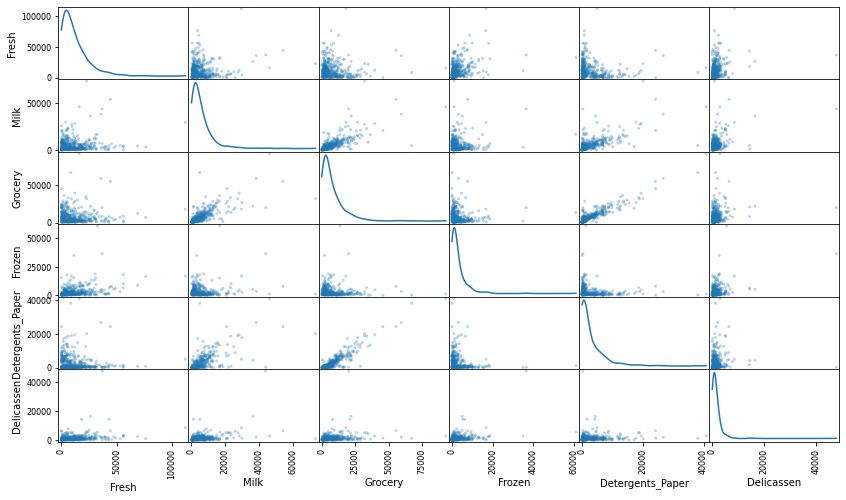

In [58]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

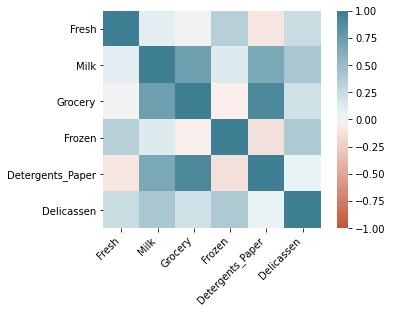

In [62]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Question 3 <br>
Existem pares de características que exibem algum grau de correlação?
Isso confirma ou nega suas suspeitas sobre a relevância do recurso que você tentou prever?
Como os dados para esses recursos são distribuídos?
Dica: os dados são distribuídos normalmente? Onde está a maioria dos pontos de dados?



Alta correlação:
    - Grocery com Milk
    - Detergents_paper com Grocery
    - Detergents_paper com Milk
    
Essas correlação reforça o resultado obtido quando Grocery foi *regredido* com as demais variáveis

Os dados não Normalmente Distribuídos devido a presença de *outliers*

## Data Preprocessing

Como visto anteriormente os dados não são Normalmente Distribuídos, será necessário normalizados já que
os algoritmos de clusterização exigem que sigam uma distribuiição Normal.
Uma das técnicas mais simples para normalizar o dado seria aplicar o *log*

In [65]:
log_dataset = np.log(dataset)

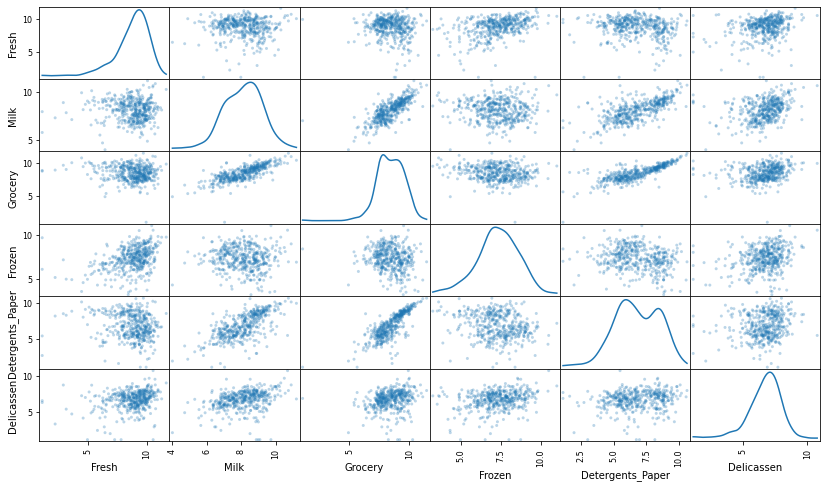

In [67]:
# Checando se as distribuições entre as features se mantiveram depois da aplicação do log
pd.plotting.scatter_matrix(log_dataset, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

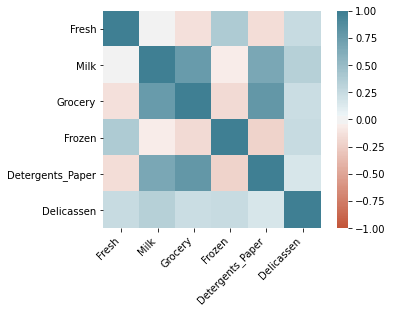

In [68]:
corr = log_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Outlier Detection

Um dos métodos para se detectar Outliers é utilizando o [Tukey's Method for identfying outlier](https://datatest.readthedocs.io/en/stable/how-to/outliers.html)

In [105]:
def detect_outlier_per_feature(dataset, column):
    # First Quartile
    Q1 = np.percentile(dataset.loc[:, column], 25)
    
    # Third Quartile
    Q3 = np.percentile(dataset.loc[:, column], 75)
    step = 1.5 * (Q3 - Q1)
    
    outliers_index = dataset.loc[~((dataset[column] >= Q1 - step) & (dataset[column] <= Q3 + step)), :].index
    return outliers_index

In [106]:
outliers_list = []

for feature in log_dataset.columns:
    feature_outliers = detect_outlier_per_feature(log_dataset, feature)
    outliers_list.append(feature_outliers)

In [107]:
outliers = list(itertools.chain.from_iterable(outliers_list))

In [108]:
unique_outliers = set(outliers)

Existem 5 amostras que são consideradas outliers por mais de uma feature:

In [109]:
# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

In [110]:
dup_outliers

[128, 65, 66, 75, 154]

Eles devem ser removidos, pois não são apenas discrepantes em uma categoria, mas mais de uma vez.

In [111]:
# Remove Duplicate Outliers

good_data = log_dataset.drop(log_dataset.index[dup_outliers]).reset_index(drop = True)

In [112]:
good_data.shape

(435, 6)